Building and comparing 3 vanilla auto-encoder neural networks with different latent spaces and nodes.

1st NN: Using 10 nodes.

2nd NN: Using 100 nodes.

3rd NN: Using 250 nodes.

In [1]:
# initial imports
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error

# global variables
seed = 42

C:\Users\nomad\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading and parsing the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# spliting the data to training, validation and test sets
# dividing by 255.(float)  to scale the pixels down to 0-1 scale
X_train = X_train_full[:-10000]/255.
y_train = y_train_full[:-10000]
X_valid = X_train_full[-10000:]/255.
y_valid = y_train_full[-10000:]
X_test = X_test/255.

# reshaping the images (28x28=784)
X_train = X_train.reshape( (-1, 784))
X_valid = X_valid.reshape( (-1, 784))
X_test  = X_test.reshape(  (-1, 784))

In [3]:
# since we will use multiple different latent spaces(10,100,250) we will create a function
def vanilla_model(latent_space):
  # setting the random seed
  tf.random.set_seed(seed)

  # this is our input placeholder
  input_img = Input( shape = (784,) )

  # "encoded" is the encoded representation of the input
  encoded = Dense(latent_space, activation = 'relu')(input_img)

  # "decoded" is the lossy reconstruction of the input
  decoded = Dense(784, activation = 'sigmoid')(encoded)

  # this model maps an input to its reconstruction
  autoencoder = Model(input_img, decoded)

  return autoencoder

In [4]:
def fit_model(vanilla_model,nnodes,this_patience):

  # compiling the model
  vanilla_model.compile(optimizer = "adam", loss = "binary_crossentropy")

  # applying early stopping
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                    patience=this_patience,
                                                    restore_best_weights=True)

  history = vanilla_model.fit(X_train, X_train, epochs=100, batch_size = 32,
                              validation_data=(X_valid, X_valid),
                              callbacks=[early_stopping])

  reconstructed = vanilla_model.predict(X_test)
  mse = mean_squared_error(X_test, reconstructed)

  print(f"\n\nLatent space size: {nnodes:3d}, {mse:.6f}\n\n")
  print("Epoch where the best model was fitted:", early_stopping.stopped_epoch)

  # Plotting training and validation loss
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.show()


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2812 - val_loss: 0.1712
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1698 - val_loss: 0.1629
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1631 - val_loss: 0.1594
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1599 - val_loss: 0.1572
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1578 - val_loss: 0.1561
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1567 - val_loss: 0.1555
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1561 - val_loss: 0.1550
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1556 - val_loss: 0.1547
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1553 - val_loss: 0.1545
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1550 - val_loss: 0.1543
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1548 - val_loss: 0.1541
Epoch 12/100
1563/1

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1529 - val_loss: 0.1526
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Latent space size:  10, 0.029407


Epoch where the best model was fitted: 66


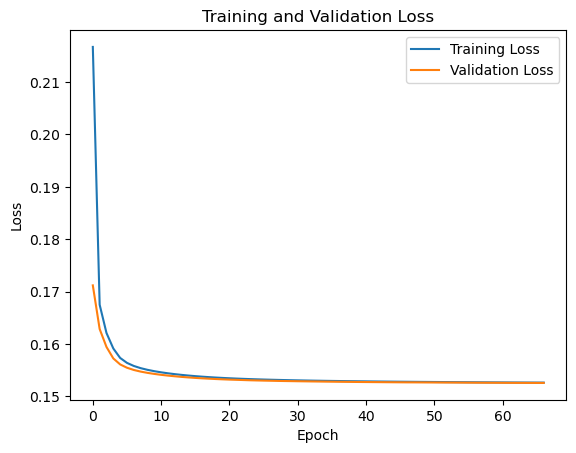

In [5]:
fit_model(vanilla_model(10),10,1)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1906 - val_loss: 0.0874
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0828 - val_loss: 0.0753
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0740 - val_loss: 0.0721
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0714 - val_loss: 0.0707
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0702 - val_loss: 0.0700
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0695 - val_loss: 0.0696
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0690 - val_loss: 0.0693
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0687 - val_loss: 0.0691
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0685 - val_loss: 0.0689
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0684 - val_loss: 0.0688
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0683 - val_loss: 0.0687
Epoch 12/100
1563/1

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 68/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 69/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 70/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 71/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 72/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 73/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 74/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 75/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 76/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0680
Epoch 77/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0674 - val_loss: 0.0680
Epoch 78/100
1563/1563 

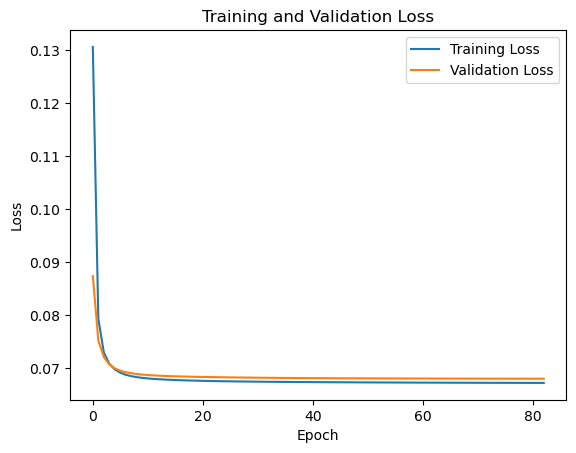

In [6]:
fit_model(vanilla_model(100),100,3)


In [ ]:
fit_model(vanilla_model(250),250,5)



Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1591 - val_loss: 0.0750
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0726 - val_loss: 0.0692
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0684 - val_loss: 0.0676
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0669 - val_loss: 0.0667
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0661 - val_loss: 0.0662
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0657 - val_loss: 0.0659
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0653 - val_loss: 0.0656
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0651 - val_loss: 0.0655
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0649 - val_loss: 0.0654
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0648 - val_loss: 0.0653
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0647 - val_loss: 0.0652
Epoch 12/100
1563/1

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0640 - val_loss: 0.0647
Epoch 68/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0640 - val_loss: 0.0647
Epoch 69/100
1384/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0640

After fitting the autoencoder for 10, 100 and 250 of nodes, we got 0.029723, 0.002185 and 0.001094 of MSE respectively. The autoencoder that performed better was the one with the 10 latent spaces. The execution time was the fastest out of the 3 and while we got a better MSE on the 100 and 250 ones, they were far slower and the change in MSE was negligible at best. Also while plotting the training and validation loss I discovered that the validation loss was higher than the training loss on the 100 and 250 latent spaces, thus making me believe that the autoencoder might be overfitting the data.